## setups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading'

In [27]:
newfile=f'{bigDir}\\new dataset\signals_new_v3.csv'
orgfile=f'{bigDir}\signals_org_v3.csv'

In [28]:
newdata=pd.read_csv(newfile)
orgdata=pd.read_csv(orgfile)

In [29]:
newdata['day']=[f"d{x.split('_')[0]}" for x in newdata.file]
newdata = newdata.astype({"day": 'object'})
set(newdata['day'])

{'d20191203'}

In [30]:
for i, cell in newdata.iterrows():
    newdata.at[i,'decon']="d" in newdata.loc[i,'file']

In [31]:
newdata['p_age']=newdata['physical age [min]'] / 60 +1

In [32]:
newdata=newdata.drop(columns=['Unnamed: 0'])

In [33]:
newdata.head()

,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,decon,p_age
0,20191203_cell-01.czi,20191125-01-20,191125pcnat_dhbr_cdc6vxy01,1552.152,240.479,MCM3,1,HP1beta,2,3,...,4333228408,1812074514,1086345328,725729186,5857210228,2088246298,3768963930,d20191203,False,NaN
1,20191203_cell-03.czi,20191125-01-25,191125pcnat_dhbr_cdc6vxy01,1650.585,324.968,MCM3,1,HP1beta,2,3,...,2766073336,1229128157,590797501,638330656,3296613243,843647317,2452965926,d20191203,False,1.500000
2,20191203_cell-05.czi,20191125-01-36,191125pcnat_dhbr_cdc6vxy01,1705.099,468.246,MCM3,1,HP1beta,2,3,...,2481093586,1336272374,833565325,502707049,3270042867,1088428286,2181614581,d20191203,False,2.166667
3,20191203_cell-08.czi,20191125-01-41,191125pcnat_dhbr_cdc6vxy01,332.674,553.990,MCM3,1,HP1beta,2,3,...,2239047378,964331411,525832808,438498603,2862454954,878283999,1984170955,d20191203,False,5.833333
4,20191203_cell-11.czi,20191125-01-54,191125pcnat_dhbr_cdc6vxy01,647.356,843.150,MCM3,1,HP1beta,2,3,...,2222093798,915332396,370723745,544608651,2672523986,700056649,1972467337,d20191203,False,6.666667


# molecular age modifications - newdata

In [35]:
def mol_age_mod (threshold,add_min=False):
    
    newdata['mol_age_mod']=newdata['molecular age']
    mol_age_change=newdata.loc[((newdata.p_age<threshold) & (newdata.category=='earlyG1')),'mol_age_mod']
    if add_min:
        add=np.min(mol_age_change)
    else:
        add=0
    newdata.loc[((newdata.p_age<threshold) & (newdata.category=='earlyG1')),'mol_age_mod']=-1*newdata['mol_age_mod']+np.max(mol_age_change)+add
    return mol_age_change

<IPython.core.display.Javascript object>


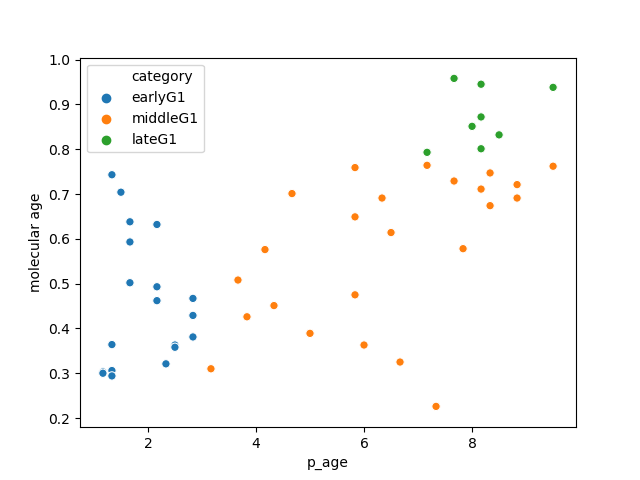

In [36]:
%matplotlib notebook 
sn.scatterplot(x='p_age',y='molecular age',data=newdata.loc[['G1' in x for x in newdata.category],:],hue='category')

### initial modification

In [37]:
mol_age_change=mol_age_mod(2)

<IPython.core.display.Javascript object>


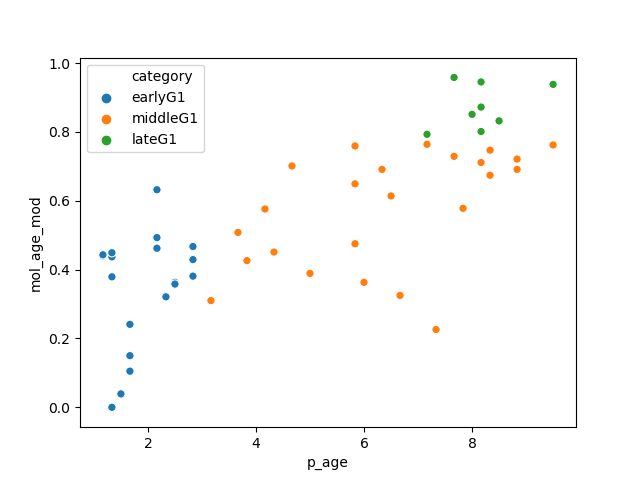

In [38]:
%matplotlib notebook 
sn.scatterplot(x='p_age',y='mol_age_mod',data=newdata.loc[['G1' in x for x in newdata.category],:],hue='category')

### second modification

In [39]:
mol_age_change=mol_age_mod(2,True)

<IPython.core.display.Javascript object>


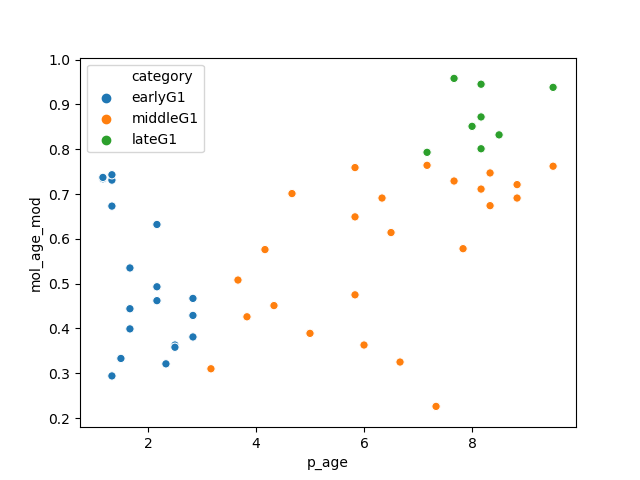

In [40]:
%matplotlib notebook 
sn.scatterplot(x='p_age',y='mol_age_mod',data=newdata.loc[['G1' in x for x in newdata.category],:],hue='category')

### third modification

In [41]:
newdata['mol_age_mod']=newdata['molecular age']
newdata.loc[((newdata.p_age<2) & (newdata.category=='earlyG1')),'mol_age_mod']=np.min(mol_age_change)

<IPython.core.display.Javascript object>


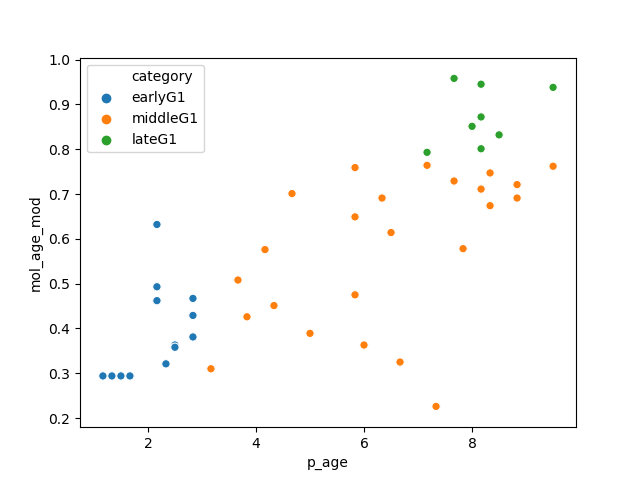

In [42]:
%matplotlib notebook 
sn.scatterplot(x='p_age',y='mol_age_mod',data=newdata.loc[['G1' in x for x in newdata.category],:],hue='category')

### fifth modification

In [43]:
newdata['mol_age_mod']=newdata['molecular age']
newdata.loc[((newdata.p_age<2) & (newdata.category=='earlyG1')),'mol_age_mod']=np.min(newdata['molecular age'])

<IPython.core.display.Javascript object>


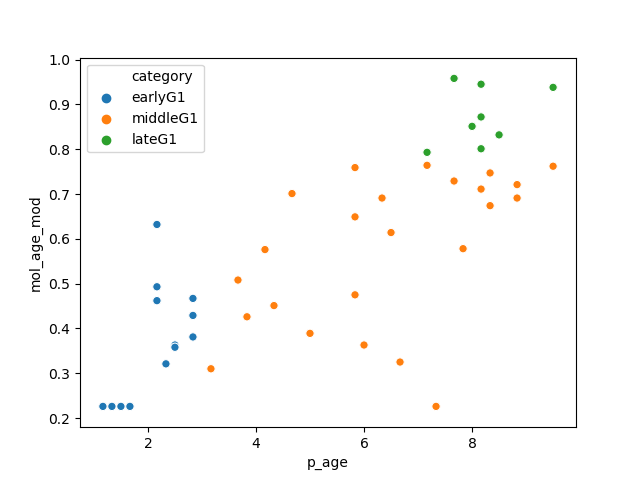

In [44]:
%matplotlib notebook 
sn.scatterplot(x='p_age',y='mol_age_mod',data=newdata.loc[['G1' in x for x in newdata.category],:],hue='category')

In [26]:
newdata.index[((newdata.p_age<2) & (newdata.category=='earlyG1'))]

Int64Index([  1,   7,  11,  12,  13,  14,  24,  42,  56,  58,  77,  83,  87,
             88,  89,  90, 100, 118, 132, 134],
           dtype='int64')

In [45]:
newdata.head()

,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,decon,p_age,mol_age_mod
0,20191203_cell-01.czi,20191125-01-20,191125pcnat_dhbr_cdc6vxy01,1552.152,240.479,MCM3,1,HP1beta,2,3,...,1812074514,1086345328,725729186,5857210228,2088246298,3768963930,d20191203,False,NaN,1.373
1,20191203_cell-03.czi,20191125-01-25,191125pcnat_dhbr_cdc6vxy01,1650.585,324.968,MCM3,1,HP1beta,2,3,...,1229128157,590797501,638330656,3296613243,843647317,2452965926,d20191203,False,1.500000,0.226
2,20191203_cell-05.czi,20191125-01-36,191125pcnat_dhbr_cdc6vxy01,1705.099,468.246,MCM3,1,HP1beta,2,3,...,1336272374,833565325,502707049,3270042867,1088428286,2181614581,d20191203,False,2.166667,0.632
3,20191203_cell-08.czi,20191125-01-41,191125pcnat_dhbr_cdc6vxy01,332.674,553.990,MCM3,1,HP1beta,2,3,...,964331411,525832808,438498603,2862454954,878283999,1984170955,d20191203,False,5.833333,0.759
4,20191203_cell-11.czi,20191125-01-54,191125pcnat_dhbr_cdc6vxy01,647.356,843.150,MCM3,1,HP1beta,2,3,...,915332396,370723745,544608651,2672523986,700056649,1972467337,d20191203,False,6.666667,0.325


In [46]:
newdata.to_csv(newfile.replace('v3','v4'))

# molecular age modification - org data

## setup for orgdata

In [47]:
orgdata['day']=[f"d{x.split('_')[0]}" for x in orgdata.file]
orgdata = orgdata.astype({"day": 'object'})
set(orgdata['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [48]:
orgdata['p_age'] = (orgdata.DHB_len - 1) *10 / 60

In [49]:
for i, cell in orgdata.iterrows():
    orgdata.at[i,'decon']="d" in orgdata.loc[i,'file']

In [50]:
orgdata.head()

,Unnamed: 0,file,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),ab1 ch,ab2 (MCM),...,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,p_age
0,0,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,906,HP1B,1,MCM3,...,3409276612,7162938559,2603414820,1697958740,905456080,8884586027,3279220769,5605365258,d20190625,0.666667
1,1,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,252,HP1B,1,MCM3,...,3719191199,7431493902,2648661524,1905903649,742757875,9380929412,3599108812,5781820600,d20190625,2.000000
2,2,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,160,HP1B,1,MCM3,...,3427135508,7047608358,2521721709,1686519354,835202355,8834283118,3324641538,5509641580,d20190625,2.000000
3,3,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,324,HP1B,1,MCM3,...,8811837764,12804850980,5093678518,3586438085,1507240433,17937429925,8422452590,9514977335,d20190625,19.500000
4,4,20190625_cell-06.czi,7L-G3,0,190619-cdc6-dhb-pcna002xy09,492,506,HP1B,1,MCM3,...,9410591117,13605913882,5393419582,3580233032,1813186550,19119940517,9043613417,10076327100,d20190625,18.833333


<IPython.core.display.Javascript object>


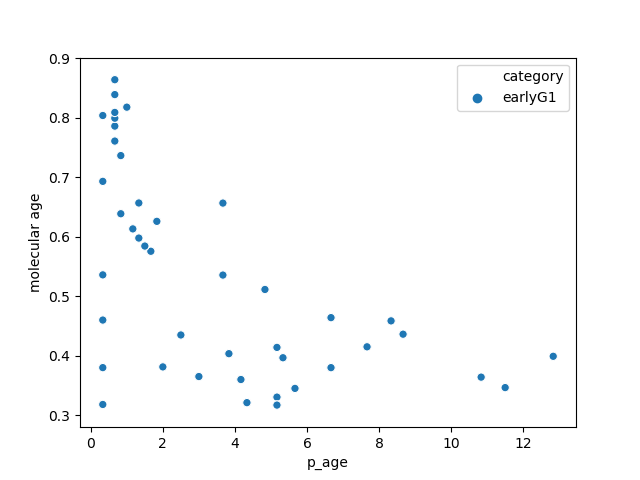

In [51]:
%matplotlib notebook 
sn.scatterplot(x='p_age',y='molecular age',data=orgdata.loc[((orgdata.day!='d20190625') & (orgdata.day!='d201907012') &
                                                           ['early' in x for x in orgdata.category]),:],hue='category')

In [52]:
def mol_age_mod_org (threshold,add_min=False):
    
    orgdata['mol_age_mod']=orgdata['molecular age']
    mol_age_change=orgdata.loc[((orgdata.p_age<threshold) & (orgdata.category=='earlyG1')),'mol_age_mod']
    if add_min:
        add=np.min(mol_age_change)
    else:
        add=0
    orgdata.loc[((orgdata.p_age<threshold) & (orgdata.category=='earlyG1')),'mol_age_mod']=-1*orgdata['mol_age_mod']+np.max(mol_age_change)+add
    return mol_age_change

### initial modification

In [53]:
mol_age_change=mol_age_mod_org(2)

<IPython.core.display.Javascript object>


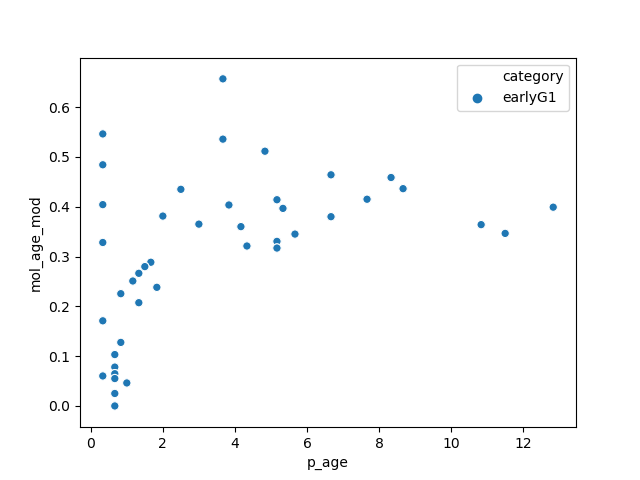

In [54]:
%matplotlib notebook 
sn.scatterplot(x='p_age',y='mol_age_mod',data=orgdata.loc[((orgdata.day!='d20190625') & (orgdata.day!='d201907012') &
                                                           ['early' in x for x in orgdata.category]),:],hue='category')

### second modification

In [55]:
mol_age_change=mol_age_mod_org(2,True)

<IPython.core.display.Javascript object>


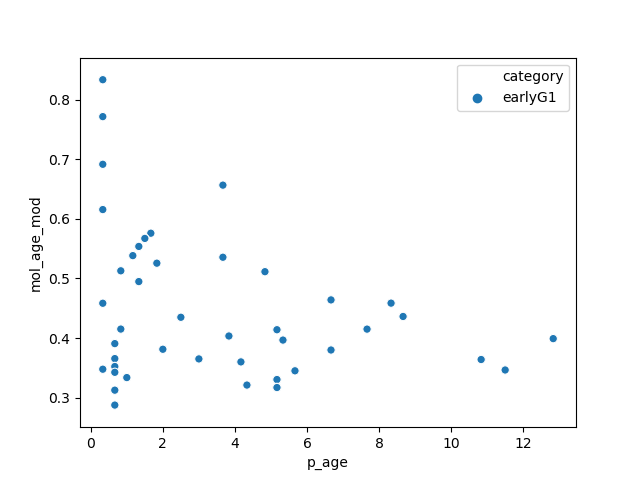

In [56]:
%matplotlib notebook 
sn.scatterplot(x='p_age',y='mol_age_mod',data=orgdata.loc[((orgdata.day!='d20190625') & (orgdata.day!='d201907012') &
                                                           ['early' in x for x in orgdata.category]),:],hue='category')

### third modification

In [57]:
orgdata['mol_age_mod']=orgdata['molecular age']
orgdata.loc[((orgdata.p_age<1.5) & (orgdata.category=='earlyG1')),'mol_age_mod']=np.min(mol_age_change)

<IPython.core.display.Javascript object>


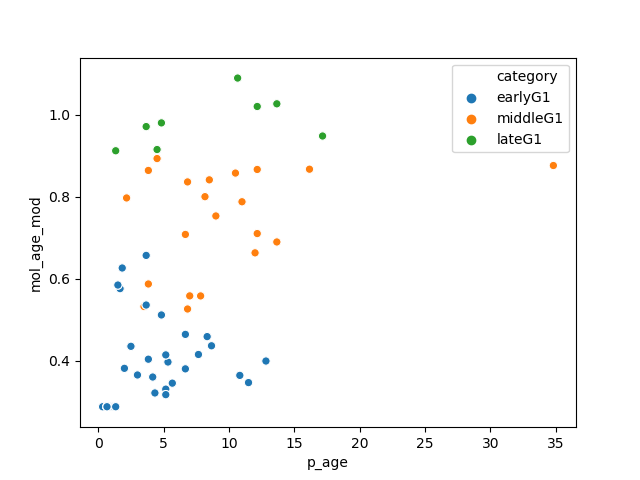

In [58]:
%matplotlib notebook 
sn.scatterplot(x='p_age',y='mol_age_mod',data=orgdata.loc[((orgdata.day!='d20190625') & (orgdata.day!='d201907012') &
                                                           ['G1' in x for x in orgdata.category]),:],hue='category')

### fourth modification

In [59]:
orgdata['mol_age_mod']=orgdata['molecular age']
orgdata.loc[((orgdata.p_age<2) & (orgdata.category=='earlyG1')),'mol_age_mod']=np.min(orgdata['molecular age'])

<IPython.core.display.Javascript object>


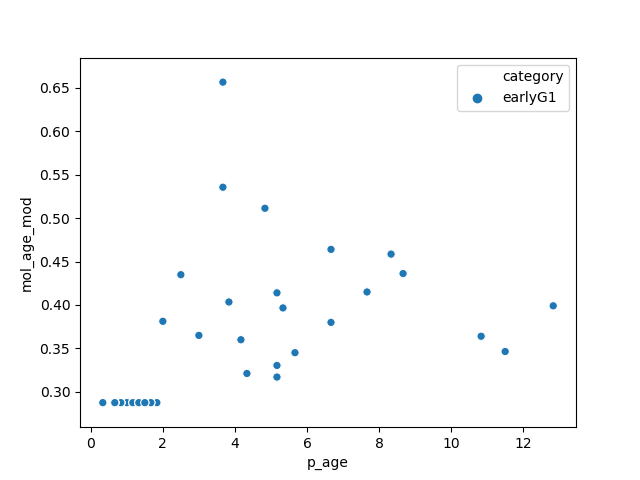

In [60]:
%matplotlib notebook 
sn.scatterplot(x='p_age',y='mol_age_mod',data=orgdata.loc[((orgdata.day!='d20190625') & (orgdata.day!='d201907012') &
                                                           ['early' in x for x in orgdata.category]),:],hue='category')

In [61]:
orgdata.index[((orgdata.p_age<1.5) & (orgdata.category=='earlyG1'))]

Int64Index([  0,  19,  38,  39,  48,  49,  50,  59,  60,  61,  62,  63,  80,
             81,  82,  83, 100, 101, 113, 114, 115, 116, 128, 129, 130, 131,
            132, 133, 134, 151, 152, 153, 154, 155, 173, 174, 192, 193, 208,
            209, 227, 228],
           dtype='int64')

In [62]:
orgdata.head()

,Unnamed: 0,file,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),ab1 ch,ab2 (MCM),...,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,p_age,mol_age_mod
0,0,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,906,HP1B,1,MCM3,...,7162938559,2603414820,1697958740,905456080,8884586027,3279220769,5605365258,d20190625,0.666667,0.287517
1,1,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,252,HP1B,1,MCM3,...,7431493902,2648661524,1905903649,742757875,9380929412,3599108812,5781820600,d20190625,2.000000,0.431866
2,2,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,160,HP1B,1,MCM3,...,7047608358,2521721709,1686519354,835202355,8834283118,3324641538,5509641580,d20190625,2.000000,0.499777
3,3,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,324,HP1B,1,MCM3,...,12804850980,5093678518,3586438085,1507240433,17937429925,8422452590,9514977335,d20190625,19.500000,1.479820
4,4,20190625_cell-06.czi,7L-G3,0,190619-cdc6-dhb-pcna002xy09,492,506,HP1B,1,MCM3,...,13605913882,5393419582,3580233032,1813186550,19119940517,9043613417,10076327100,d20190625,18.833333,1.517313


In [63]:
orgdata=orgdata.drop(columns=['Unnamed: 0'])

In [64]:
orgdata.to_csv(orgfile.replace("v3","v4"))

# merging modified dataframes into one file

In [65]:
newdata=newdata.rename(columns={'ab2 (heterochromatin)': 'ab1 (heterochromatin)'})

In [66]:
merged=pd.concat([orgdata,newdata],join='inner', ignore_index=True)

In [67]:
orgdata.columns

Index(['file', 'original cell name', 'Amy_mod', 'movie', 'x', 'y',
       'ab1 (heterochromatin)', 'ab1 ch', 'ab2 (MCM)', 'ab2 ch', 'DAPI ch',
       'DIC ch', 'category', 'physical age [min]', 'molecular age',
       'imaging core', 'cell id for tracking', 'comment', 'dhb_tracking',
       'exp', 'decon', 'track_cell_id', 'dist', 'x_track', 'y_track',
       'track_length', 'path', 'paired', 'DHB_nucleus', 'DHB_cyto',
       'DHB_ratio', 'DHB_len', 'physical_age_cleaned', 'physicalAgeMatch',
       'time_mismatch', 'track_vs_measure', 'molecularAgeMatch',
       'molecularAge_mismatch', 'nuc_vol_total', 'inner_vol_total',
       'outer_vol_total', 'nuc_mcm_total', 'inner_mcm_total',
       'outer_mcm_total', 'nuc_vol_het', 'inner_vol_het', 'outer_vol_het',
       'nuc_mcm_het', 'inner_mcm_het', 'outer_mcm_het', 'nuc_vol_eu',
       'inner_vol_eu', 'outer_vol_eu', 'nuc_mcm_eu', 'inner_mcm_eu',
       'outer_mcm_eu', 'nuc_DAPI_total', 'inner_DAPI_total',
       'outer_DAPI_total', 'nuc_

In [68]:
newdata.columns

Index(['file', 'original cell name', 'movie', 'last frame movie position x',
       'last frame movie position y', 'ab1 (MCM)', 'ab1 ch',
       'ab1 (heterochromatin)', 'ab2 ch', 'DAPI ch', 'DIC ch', 'category',
       'molecular age', 'physical age [min]', 'imaging core',
       'cell id for tracking', 'comment', 'molecular age 10', 'path',
       'nuc_vol_total', 'inner_vol_total', 'outer_vol_total', 'nuc_mcm_total',
       'inner_mcm_total', 'outer_mcm_total', 'nuc_vol_het', 'inner_vol_het',
       'outer_vol_het', 'nuc_mcm_het', 'inner_mcm_het', 'outer_mcm_het',
       'nuc_vol_eu', 'inner_vol_eu', 'outer_vol_eu', 'nuc_mcm_eu',
       'inner_mcm_eu', 'outer_mcm_eu', 'nuc_DAPI_total', 'inner_DAPI_total',
       'outer_DAPI_total', 'nuc_DAPI_het', 'inner_DAPI_het', 'outer_DAPI_het',
       'nuc_DAPI_eu', 'inner_DAPI_eu', 'outer_DAPI_eu', 'day', 'decon',
       'p_age', 'mol_age_mod'],
      dtype='object')

In [69]:
merged.columns

Index(['file', 'original cell name', 'movie', 'ab1 (heterochromatin)',
       'ab1 ch', 'ab2 ch', 'DAPI ch', 'DIC ch', 'category',
       'physical age [min]', 'molecular age', 'imaging core',
       'cell id for tracking', 'comment', 'decon', 'path', 'nuc_vol_total',
       'inner_vol_total', 'outer_vol_total', 'nuc_mcm_total',
       'inner_mcm_total', 'outer_mcm_total', 'nuc_vol_het', 'inner_vol_het',
       'outer_vol_het', 'nuc_mcm_het', 'inner_mcm_het', 'outer_mcm_het',
       'nuc_vol_eu', 'inner_vol_eu', 'outer_vol_eu', 'nuc_mcm_eu',
       'inner_mcm_eu', 'outer_mcm_eu', 'nuc_DAPI_total', 'inner_DAPI_total',
       'outer_DAPI_total', 'nuc_DAPI_het', 'inner_DAPI_het', 'outer_DAPI_het',
       'nuc_DAPI_eu', 'inner_DAPI_eu', 'outer_DAPI_eu', 'day', 'p_age',
       'mol_age_mod'],
      dtype='object')

In [70]:
orgdata.columns & newdata.columns

Index(['file', 'original cell name', 'movie', 'ab1 (heterochromatin)',
       'ab1 ch', 'ab2 ch', 'DAPI ch', 'DIC ch', 'category',
       'physical age [min]', 'molecular age', 'imaging core',
       'cell id for tracking', 'comment', 'decon', 'path', 'nuc_vol_total',
       'inner_vol_total', 'outer_vol_total', 'nuc_mcm_total',
       'inner_mcm_total', 'outer_mcm_total', 'nuc_vol_het', 'inner_vol_het',
       'outer_vol_het', 'nuc_mcm_het', 'inner_mcm_het', 'outer_mcm_het',
       'nuc_vol_eu', 'inner_vol_eu', 'outer_vol_eu', 'nuc_mcm_eu',
       'inner_mcm_eu', 'outer_mcm_eu', 'nuc_DAPI_total', 'inner_DAPI_total',
       'outer_DAPI_total', 'nuc_DAPI_het', 'inner_DAPI_het', 'outer_DAPI_het',
       'nuc_DAPI_eu', 'inner_DAPI_eu', 'outer_DAPI_eu', 'day', 'p_age',
       'mol_age_mod'],
      dtype='object')

In [71]:
merged.head()

,file,original cell name,movie,ab1 (heterochromatin),ab1 ch,ab2 ch,DAPI ch,DIC ch,category,physical age [min],...,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,p_age,mol_age_mod
0,20190625_cell-01.czi,7L-E1(T),190619-cdc6-dhb-pcna002xy09,HP1B,1,2,3,4.0,earlyG1,30,...,7162938559,2603414820,1697958740,905456080,8884586027,3279220769,5605365258,d20190625,0.666667,0.287517
1,20190625_cell-02.czi,7L-E2(B),190619-cdc6-dhb-pcna002xy09,HP1B,1,2,3,4.0,earlyG1,110,...,7431493902,2648661524,1905903649,742757875,9380929412,3599108812,5781820600,d20190625,2.000000,0.431866
2,20190625_cell-03.czi,7L-E2(T),190619-cdc6-dhb-pcna002xy09,HP1B,1,2,3,4.0,earlyG1,110,...,7047608358,2521721709,1686519354,835202355,8834283118,3324641538,5509641580,d20190625,2.000000,0.499777
3,20190625_cell-05.czi,7L-G2,190619-cdc6-dhb-pcna002xy09,HP1B,1,2,3,4.0,G2,1160,...,12804850980,5093678518,3586438085,1507240433,17937429925,8422452590,9514977335,d20190625,19.500000,1.479820
4,20190625_cell-06.czi,7L-G3,190619-cdc6-dhb-pcna002xy09,HP1B,1,2,3,4.0,G2,1120,...,13605913882,5393419582,3580233032,1813186550,19119940517,9043613417,10076327100,d20190625,18.833333,1.517313


In [72]:
merged.loc[0,]

file                                                  20190625_cell-01.czi
original cell name                                                7L-E1(T)
movie                                          190619-cdc6-dhb-pcna002xy09
ab1 (heterochromatin)                                                 HP1B
ab1 ch                                                                   1
ab2 ch                                                                   2
DAPI ch                                                                  3
DIC ch                                                                   4
category                                                           earlyG1
physical age [min]                                                      30
molecular age                                                     0.819649
imaging core                                                           HIC
cell id for tracking                                                     1
comment                  

In [73]:
merged.dtypes

file                      object
original cell name        object
movie                     object
ab1 (heterochromatin)     object
ab1 ch                     int64
ab2 ch                     int64
DAPI ch                    int64
DIC ch                   float64
category                  object
physical age [min]        object
molecular age            float64
imaging core              object
cell id for tracking     float64
comment                   object
decon                     object
path                      object
nuc_vol_total              int64
inner_vol_total            int64
outer_vol_total            int64
nuc_mcm_total              int64
inner_mcm_total            int64
outer_mcm_total            int64
nuc_vol_het                int64
inner_vol_het              int64
outer_vol_het              int64
nuc_mcm_het                int64
inner_mcm_het            float64
outer_mcm_het            float64
nuc_vol_eu                 int64
inner_vol_eu               int64
outer_vol_

In [74]:
merged.to_csv(f'{bigDir}\signals_combined_v2.csv')